In [36]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [37]:
import zipfile
import os

In [39]:
dataset_dir = path

In [40]:
print("Dataset Contents", os.listdir(dataset_dir))

Dataset Contents ['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']


In [48]:
import os

# Base dataset directory
dataset_dir = "/kaggle/input/new-plant-diseases-dataset"

# Define paths
train_dir = os.path.join(dataset_dir, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "train")
validation_dir = os.path.join(dataset_dir, "New Plant Diseases Dataset(Augmented)", "New Plant Diseases Dataset(Augmented)", "valid")
test_dir = os.path.join(dataset_dir, "test", "test")

# Verify paths
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)
print("Test directory:", test_dir)

Train directory: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
Validation directory: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
Test directory: /kaggle/input/new-plant-diseases-dataset/test/test


In [50]:
# Check if directories exist
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))
print("Test directory exists:", os.path.exists(test_dir))

Train directory exists: True
Validation directory exists: True
Test directory exists: True


In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Use the correct path here
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1763632177.156106      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763632177.156886      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [54]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,  # Use the correct path here
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [55]:
cnn = tf.keras.models.Sequential()

In [56]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [58]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [59]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [60]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [61]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [62]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [63]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 84ms/step - accuracy: 0.7763 - loss: 0.7145 - val_accuracy: 0.8952 - val_loss: 0.3309
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9650 - loss: 0.1056 - val_accuracy: 0.9562 - val_loss: 0.1352
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9729 - loss: 0.0867 - val_accuracy: 0.9412 - val_loss: 0.2122
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9767 - loss: 0.0718 - val_accuracy: 0.9644 - val_loss: 0.1096
Epoch 9/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9795 - loss: 0.0638 - val_accuracy: 0.9657 - val_loss: 0.1173
Epoch 10/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 63ms/step - accuracy: 0.9830 - loss: 0.0527 - val_accuracy: 0.9704 - val_loss: 0.0984


In [67]:
cnn.save('plant_disease_prediction_model.keras')

In [68]:
class_name = validation_set.class_names

In [69]:
test_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [70]:
y_pred = cnn.predict(test_set)
categories = tf.argmax(y_pred,axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step


In [71]:
true_categories = tf.concat([y for x, y in test_set], axis=0)  # This is already a 1D tensor
y_true = true_categories.numpy()  # Convert to NumPy if needed

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
accuracy_score(y_true,categories)

0.9703505577054404

In [74]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels=None,
    image_size=(128,128),
    batch_size=32,
    shuffle=False
)

Found 33 files.


In [75]:
predictions = cnn.predict(test_data)  # This gives raw logits/probabilities
predicted_classes = tf.argmax(predictions, axis=1).numpy()  # Get class indices

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


In [76]:
classes_names = training_set.class_names

In [77]:
Predicted_labels = [classes_names[i] for i in predicted_classes]

In [78]:
history = training_history.history

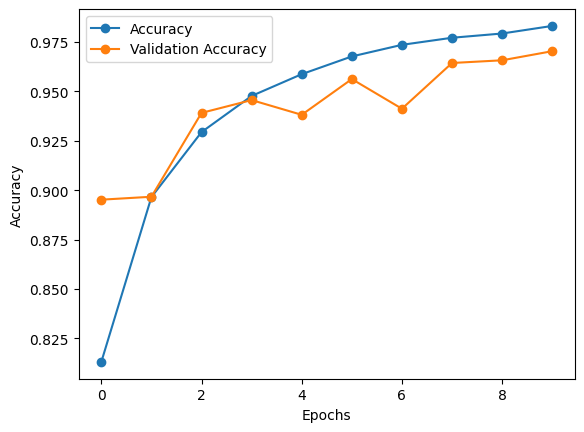

In [79]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'], label='Accuracy', marker='o')
plt.plot(history['val_accuracy'], label="Validation Accuracy", marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
cm = confusion_matrix(y_true, categories)

In [81]:
classification_report(y_true, categories, target_names=classes_names)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.97      0.97      0.97       504\n                                 Apple___Black_rot       0.98      0.98      0.98       497\n                          Apple___Cedar_apple_rust       0.94      1.00      0.97       440\n                                   Apple___healthy       0.97      0.96      0.96       502\n                               Blueberry___healthy       0.92      0.99      0.96       454\n          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421\n                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410\n                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.95      

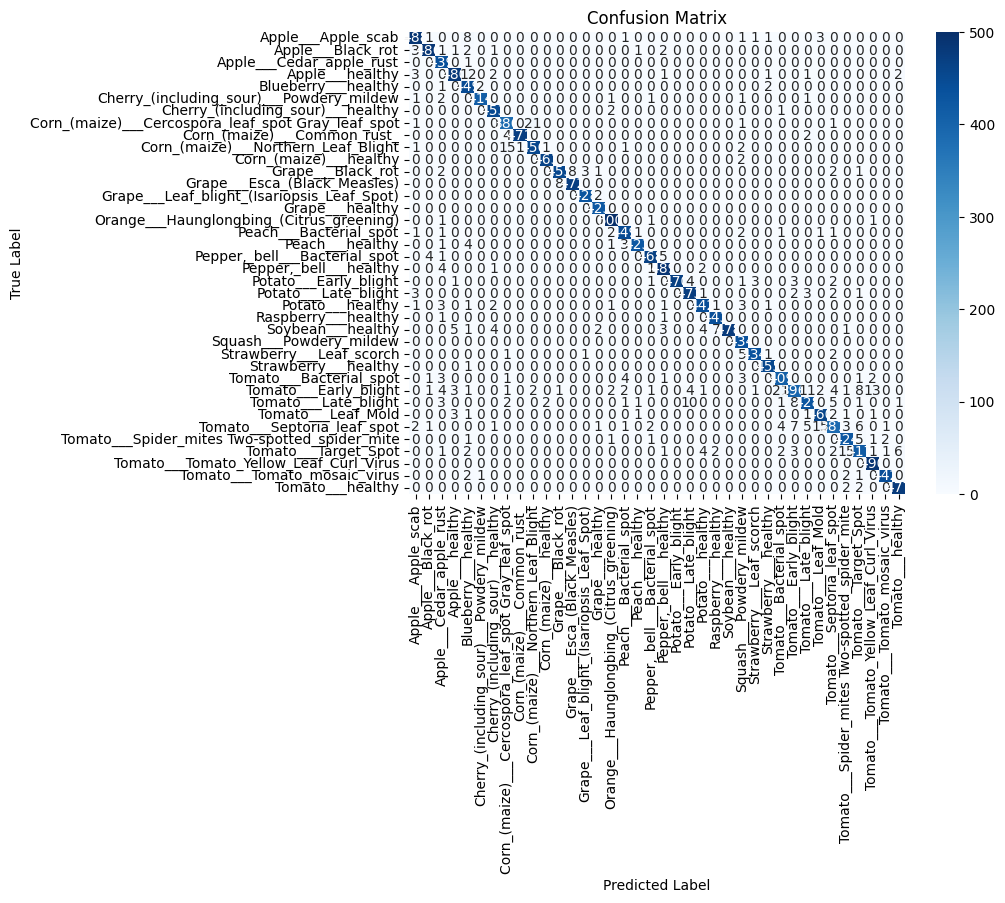

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [83]:
cnn.save('plant-disease-prediction-model.h5')

In [86]:
from IPython.display import FileLink
FileLink('plant-disease-prediction-model.h5')


/kaggle/working/plant-disease-prediction-model.h5